# Module 8 Assignment

by Niharika Madhadi

## Overview

We will do feature selection and regularization for extracting useful data

Be sure to replace the stud_id variable with you student id. Automatic 0 if not properly replaced.

In [ ]:
# create seed, run this cell as is, only edit your stud_id
import pandas as pd
import numpy as np
import pandas as pd
import string
import random
import re
from sklearn.datasets import make_regression

n = 500

def make_null(r, w):
    # rtn = random.choices([np.nan, r])
    wi = w * .1
    rtn = np.random.choice([r, np.NaN], p=[1-wi, wi])
    return re.sub(r"[\[\]]",'', str(rtn))


# provide your student id as stud_id, replace 123456789 (automatice 0 if not replaced with your student id)
stud_id = 11659474
my_seed = random.seed(stud_id)

# Do not edit this cell beyond this line
variables = [''.join(random.choices(string.ascii_lowercase, k=4)) for _ in range(30)]
print(variables)

X, y = make_regression(n_samples=n, n_features=20, n_informative=12)
# random.shuffle(variables)
cols = variables[:20]
df = pd.DataFrame(data=X, columns=cols)
df[cols[0]] = round(df[cols[0]], 4)
df[variables[20]] = 0.03
df[variables[21]] = 0.07
df[variables[22]] = df[variables[0]]
df[variables[23]] = df[cols[1]]
df[variables[24]] = df[variables[20]].apply(make_null, args=(1,))
df[variables[25]] = df[variables[13]].apply(make_null, args=(1,))
df[variables[26]] = random.sample(range(100, 1000), k=n)
df[variables[27]] = random.sample(range(1000, 10000), k=n)
df[variables[28]] = np.random.choice([.4, .1], p=[.98, .02])

df[variables[7]] = df[variables[7]].apply(lambda r: abs(r) if (r < -0.03) else r)
df[variables[8]] = df[variables[8]].apply(lambda r: abs(r)*-1 if (r > 0.02) else r)
df[variables[9]] = df[variables[9]].apply(lambda r: abs(r) if (r < -0.01) else r)
df[variables[7]] = df[variables[7]].apply(make_null, args=(1,))
df[variables[8]] = df[variables[8]].apply(make_null, args=(1,))
df[variables[9]] = df[variables[9]].apply(make_null, args=(1,))
df[variables[17]] = df[variables[17]].apply(make_null, args=(1,))
df[variables[18]] = df[variables[18]].apply(make_null, args=(1,))
df[variables[19]] = df[variables[19]].apply(make_null, args=(1,))

df = df[np.random.default_rng(seed=my_seed).permutation(df.columns.values)]

df = df.assign(survival=[random.choice(['x', 'o']) for i in range(n)])
df = df.assign(treatment=[random.choice(['yes', 'no']) for i in range(n)])
df = df.assign(level=[random.choice(['level 1', 'level 2', 'level 3']) for i in range(n)])
df = df.assign(stage=[random.choice(['stage 5', 'stage 4', 'stage 3', 'stage 2', 'stage 1']) for i in range(n)])

df['target'] = y

dupes = df.loc[0:10]
df = pd.concat([df, dupes], axis=0)

df = df.sample(frac=1).reset_index(drop=True)

#df.to_csv('Assignment 8.csv', index=False) # comment this out after successful run so that you don't overwrite your data

['srpl', 'afga', 'tean', 'gilp', 'dksi', 'xskt', 'dryv', 'lydd', 'qhff', 'sghg', 'ojlb', 'rfjl', 'mqkp', 'wmdz', 'xnra', 'watb', 'tomw', 'vahl', 'utjd', 'ptza', 'elws', 'yspt', 'yxsn', 'luhu', 'tusx', 'qgxi', 'crzq', 'mvny', 'xcqg', 'anpa']


In [ ]:
# read the dataset created above into a datagrame and output shape, info, and head
import pandas as pd

print(df.shape)
print(df.info())
df.head()

(511, 34)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   crzq       511 non-null    int64  
 1   xskt       511 non-null    float64
 2   elws       511 non-null    float64
 3   luhu       511 non-null    float64
 4   dryv       511 non-null    float64
 5   qgxi       511 non-null    object 
 6   qhff       511 non-null    object 
 7   yspt       511 non-null    float64
 8   ptza       511 non-null    object 
 9   mvny       511 non-null    int64  
 10  tean       511 non-null    float64
 11  mqkp       511 non-null    float64
 12  gilp       511 non-null    float64
 13  watb       511 non-null    float64
 14  dksi       511 non-null    float64
 15  xnra       511 non-null    float64
 16  xcqg       511 non-null    float64
 17  sghg       511 non-null    object 
 18  lydd       511 non-null    object 
 19  rfjl       511 non-null    float64
 20  

,crzq,xskt,elws,luhu,dryv,qgxi,qhff,yspt,ptza,mvny,...,tomw,srpl,yxsn,ojlb,tusx,survival,treatment,level,stage,target
0,763,-0.479048,0.03,0.093940,0.431847,1.2581638456237123,-0.6618029792185811,0.07,0.8210474296918906,9984,...,-0.379950,-0.8471,-0.8471,0.389818,0.03,o,no,level 3,stage 4,-64.697315
1,968,0.058466,0.03,0.157772,-0.745162,-1.6369130415768283,-0.8805191191028319,0.07,-0.4159521881004975,7381,...,-0.147004,1.1359,1.1359,-1.188120,0.03,o,no,level 1,stage 1,-51.661892
2,746,0.390229,0.03,0.608839,0.267746,-0.07779445496493609,-0.029361422946968214,0.07,0.2313811614701462,9482,...,-0.618302,0.1011,0.1011,1.191941,0.03,x,no,level 1,stage 2,156.687886
3,242,0.013071,0.03,-0.570635,-1.344628,nan,-0.9410720851193287,0.07,-0.6353654152509565,8276,...,2.680597,0.0817,0.0817,0.497930,0.03,o,no,level 3,stage 1,-83.528912
4,863,0.224905,0.03,1.022870,-0.524690,0.648723916131612,-0.6735940973968891,0.07,0.34505516045402995,2802,...,0.084007,0.2130,0.2130,-0.463558,0.03,x,yes,level 3,stage 5,-171.942840


In [ ]:
# output and drop constants


const=[
    i for i in df.columns if len(df[i].fillna(0).unique())==1
]
print(const)

#dropping constants
df.drop(const,axis=1,inplace=True)

['elws', 'yspt', 'xcqg']


In [ ]:
# output quasi constants and drop quasi constants (don't drop bi-label features)

quasi_constant = []
for i in df.columns.sort_values():
    if (len(df[i].unique()) < 3):
        counts = df[i].value_counts(normalize=True)
        print(counts)
        if list(counts)[0] > .98:
            quasi_constant.append(i)
print('***********')
print('Quasi Constants are :', quasi_constant)

#dropping quasi constants
df.drop(quasi_constant,axis=1,inplace=True)

o    0.526419
x    0.473581
Name: survival, dtype: float64
no     0.540117
yes    0.459883
Name: treatment, dtype: float64
0.03    0.913894
nan     0.086106
Name: tusx, dtype: float64
***********
Quasi Constants are : []


In [ ]:
# output and drop duplicate rows, print shape

df[df.duplicated()]


,crzq,xskt,luhu,dryv,qgxi,qhff,ptza,mvny,tean,mqkp,...,tomw,srpl,yxsn,ojlb,tusx,survival,treatment,level,stage,target
163,297,0.554070,0.359540,-0.386540,0.14597733575653496,-0.13820439440198284,-0.836970225125068,3541,-1.165955,-2.018064,...,-0.137103,-1.6885,-1.6885,0.569011,0.03,o,no,level 1,stage 5,-178.378058
180,837,-0.572860,0.004806,-0.306986,-0.040126895758246184,-0.41378092579563314,-1.52866392794968,3446,-0.179251,-0.035589,...,-0.094357,0.9129,0.9129,-0.882895,0.03,o,no,level 1,stage 3,-89.416277
198,500,-0.474686,0.102736,1.211686,-0.1584931620758412,-0.3334689461572913,0.7164953130851522,4459,-0.139543,1.984529,...,1.565193,-0.8479,-0.8479,0.091119,0.03,x,no,level 3,stage 5,188.747274
366,413,0.651428,-0.843524,-0.925287,0.5634829668461148,-0.5854158171118645,1.4499918357867916,8324,0.814118,0.052942,...,-0.022614,-1.2284,-1.2284,-0.209854,0.03,o,no,level 1,stage 5,-119.192519
379,531,0.253361,-0.664720,0.270406,-1.8249631686240537,-0.06399999733342895,0.5197770439592624,7050,-0.711140,-2.205254,...,2.033492,-0.6371,-0.6371,0.208308,0.03,x,no,level 2,stage 4,95.204167
426,685,1.350237,-0.132605,-0.160877,-0.7915668563167397,nan,-0.9440197354519385,8305,0.152620,1.028264,...,-0.438567,-1.2166,-1.2166,-0.635919,0.03,o,no,level 1,stage 4,-202.615163
430,397,-1.408784,-0.113087,-0.878110,-1.1742925626184504,-0.244846652755268,1.1054522043908832,2066,0.732231,0.183645,...,1.338745,-0.3921,-0.3921,1.070927,0.03,x,yes,level 3,stage 1,28.518458
443,285,-0.430768,-1.022661,0.295830,-1.8643989840029471,-0.0878226150646248,0.6367937951872827,4232,0.713485,-0.684531,...,-0.339110,0.7843,0.7843,-1.111940,0.03,o,no,level 1,stage 5,24.977750
448,824,1.098048,1.182843,-0.664990,-0.5648479421257403,-0.4094200827878047,nan,4685,-1.155268,-0.555444,...,-0.023428,1.2448,1.2448,0.060611,0.03,x,no,level 3,stage 4,30.312677
467,769,1.167349,0.903375,1.548909,0.22918132301063068,0.006164014051839801,-1.2380355027525896,2598,0.626236,1.488618,...,-0.887281,0.4309,0.4309,-1.135667,0.03,x,no,level 3,stage 1,224.148575


In [ ]:

df.drop_duplicates(inplace=True)
print(df.shape)

(500, 31)


In [ ]:
# check of duplicate columns

duplicate_features = []
for i in range(0, len(df.columns)):
    orig = df.columns[i]

    for j in df.columns[i + 1:]:
        if df[orig].equals(df[j]):
            duplicate_features.append(j)
            print(f'{orig} looks the same as {j}')

duplicate_features

luhu looks the same as afga
srpl looks the same as yxsn


['afga', 'yxsn']

In [ ]:
# drop duplicate features and output shape

df.drop(['afga','srpl'],axis=1,inplace=True)
print(df.shape)

(500, 29)


### Imputation

Use histograms to view the shape of your numerical features.
* Use median to replace missing data for skewed features
* Use interpolation to replace missing data for features that look normal

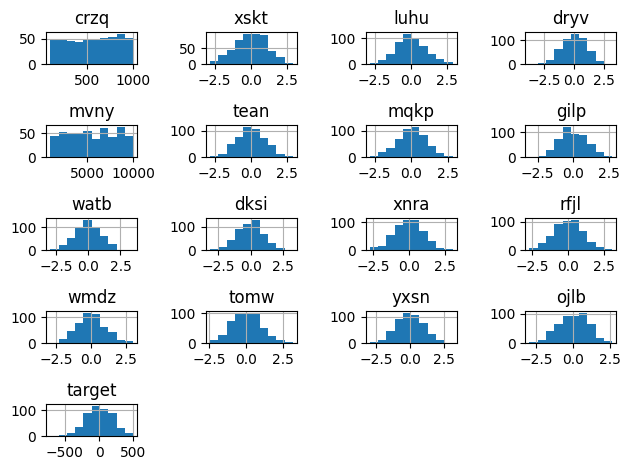

In [ ]:
# plot histograms
import matplotlib.pyplot as plt

df.hist()
plt.tight_layout();

In [ ]:
# show null values for each variable
df.isnull().sum()

crzq         0
xskt         0
luhu         0
dryv         0
qgxi         0
qhff         0
ptza         0
mvny         0
tean         0
mqkp         0
gilp         0
watb         0
dksi         0
xnra         0
sghg         0
lydd         0
rfjl         0
vahl         0
utjd         0
wmdz         0
tomw         0
yxsn         0
ojlb         0
tusx         0
survival     0
treatment    0
level        0
stage        0
target       0
dtype: int64

In [ ]:
# print info to recall which variables are numeric vs categorical

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 510
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   crzq       500 non-null    int64  
 1   xskt       500 non-null    float64
 2   luhu       500 non-null    float64
 3   dryv       500 non-null    float64
 4   qgxi       500 non-null    object 
 5   qhff       500 non-null    object 
 6   ptza       500 non-null    object 
 7   mvny       500 non-null    int64  
 8   tean       500 non-null    float64
 9   mqkp       500 non-null    float64
 10  gilp       500 non-null    float64
 11  watb       500 non-null    float64
 12  dksi       500 non-null    float64
 13  xnra       500 non-null    float64
 14  sghg       500 non-null    object 
 15  lydd       500 non-null    object 
 16  rfjl       500 non-null    float64
 17  vahl       500 non-null    object 
 18  utjd       500 non-null    object 
 19  wmdz       500 non-null    float64
 20  tomw      

In [ ]:
# replace missing data with appropriate mean, median, or mode and confirm with isnull().sum()

# select missing values - https://stackoverflow.com/questions/68018432/make-a-list-of-the-variables-that-contain-missing-values-pandas
feats_with_na = [feat for feat in df._get_numeric_data().columns if df[feat].isnull().sum() > 0]
print(feats_with_na)
print()

# impute based on skewness score
for feat in feats_with_na:
  print(feat, df.feat.skew(axis=1))
  if df.feat.skew(axis=1) > 4:
    df.feat.fillna(df.feat.median(), inplace=True)
  else:
    df.feat.fillna(df.feat.mean(), inplace=True)

df.isnull().sum()

[]



crzq         0
xskt         0
luhu         0
dryv         0
qgxi         0
qhff         0
ptza         0
mvny         0
tean         0
mqkp         0
gilp         0
watb         0
dksi         0
xnra         0
sghg         0
lydd         0
rfjl         0
vahl         0
utjd         0
wmdz         0
tomw         0
yxsn         0
ojlb         0
tusx         0
survival     0
treatment    0
level        0
stage        0
target       0
dtype: int64

### Train Test Split

In [ ]:
# train test split (target is the dependent (y) variable), print the shapes for X_train and X_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('target', axis=1),
    df['target'],
    test_size=0.25,
    random_state=42)

print(X_train.shape)
print(X_test.shape)

(375, 28)
(125, 28)


**Important:** We will not be using df (the dataframe we created above) for the remaining code. Instead we will be using X_train for df and X_test when appropriate.

### Exploratory Data Analysis

In [ ]:
# describe X_train

X_train.describe()

,crzq,xskt,luhu,dryv,mvny,tean,mqkp,gilp,watb,dksi,xnra,rfjl,wmdz,tomw,yxsn,ojlb
count,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,557.858667,0.002972,0.031948,0.035390,5533.002667,0.038514,0.019921,0.003187,-0.059941,-0.036865,-0.039452,0.003196,-0.018288,0.103353,0.025575,0.013297
std,263.655288,1.070417,0.966370,1.034857,2529.831200,0.972872,0.981354,0.980525,0.973419,1.030546,0.967992,0.985054,1.017718,1.020965,0.967078,1.037505
min,100.000000,-2.817544,-2.831354,-3.691398,1002.000000,-2.723511,-2.840623,-3.068337,-2.951735,-3.123499,-2.742434,-2.468804,-2.907380,-2.421381,-2.761300,-2.933265
25%,321.500000,-0.727066,-0.660586,-0.677823,3364.000000,-0.643450,-0.616596,-0.680739,-0.740064,-0.719568,-0.755085,-0.675300,-0.695227,-0.650634,-0.585300,-0.696093
50%,574.000000,0.113009,-0.043739,0.019429,5476.000000,0.025139,0.041697,-0.019455,-0.093265,-0.024719,-0.028947,-0.029081,0.003640,0.046429,0.000700,0.051450
75%,784.500000,0.833502,0.648380,0.721904,7708.500000,0.699013,0.688696,0.644371,0.641927,0.589674,0.662560,0.693520,0.622795,0.778351,0.724500,0.804253
max,996.000000,2.922362,2.897211,3.193582,9970.000000,2.927535,2.810629,2.757187,2.997405,3.228089,3.067956,2.459456,2.999896,3.198388,3.150200,2.672036


Using X_train.describe(), identify the two features with max values greater than 100. These features have scales that are quite different than the other features and must be scaled so that they share the same scale as the other features. Standardize one feature and Normalize the other feature.

In [ ]:
# standardize feature
from sklearn.preprocessing import StandardScaler

feat = X_train._get_numeric_data().idxmax(1).iloc[0]
scaler = StandardScaler()
X_train[feat] = scaler.fit_transform(X_train[[feat]].values)
X_test[feat] = scaler.transform(X_test[[feat]].values)

In [ ]:
# normalize feature
from sklearn.preprocessing import MinMaxScaler

feat = X_train._get_numeric_data().idxmax(1).iloc[0]
scaler = MinMaxScaler()
X_train[feat] = scaler.fit_transform(X_train[[feat]].values)
X_test[feat] = scaler.transform(X_test[[feat]].values)

In [ ]:
# describe X_train again to verify transformations


pd.set_option('display.max_columns',None)
X_train.describe()


,crzq,xskt,luhu,dryv,mvny,tean,mqkp,gilp,watb,dksi,xnra,rfjl,wmdz,tomw,yxsn,ojlb
count,375.000000,375.000000,375.000000,375.000000,3.750000e+02,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000,375.000000
mean,0.511003,0.002972,0.031948,0.035390,1.468455e-16,0.038514,0.019921,0.003187,-0.059941,-0.036865,-0.039452,0.003196,-0.018288,0.103353,0.025575,0.013297
std,0.294258,1.070417,0.966370,1.034857,1.001336e+00,0.972872,0.981354,0.980525,0.973419,1.030546,0.967992,0.985054,1.017718,1.020965,0.967078,1.037505
min,0.000000,-2.817544,-2.831354,-3.691398,-1.793422e+00,-2.723511,-2.840623,-3.068337,-2.951735,-3.123499,-2.742434,-2.468804,-2.907380,-2.421381,-2.761300,-2.933265
25%,0.247210,-0.727066,-0.660586,-0.677823,-8.585160e-01,-0.643450,-0.616596,-0.680739,-0.740064,-0.719568,-0.755085,-0.675300,-0.695227,-0.650634,-0.585300,-0.696093
50%,0.529018,0.113009,-0.043739,0.019429,-2.256230e-02,0.025139,0.041697,-0.019455,-0.093265,-0.024719,-0.028947,-0.029081,0.003640,0.046429,0.000700,0.051450
75%,0.763951,0.833502,0.648380,0.721904,8.610866e-01,0.699013,0.688696,0.644371,0.641927,0.589674,0.662560,0.693520,0.622795,0.778351,0.724500,0.804253
max,1.000000,2.922362,2.897211,3.193582,1.756214e+00,2.927535,2.810629,2.757187,2.997405,3.228089,3.067956,2.459456,2.999896,3.198388,3.150200,2.672036


In [ ]:
# X_train.info()

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 230 to 102
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   crzq       375 non-null    float64
 1   xskt       375 non-null    float64
 2   luhu       375 non-null    float64
 3   dryv       375 non-null    float64
 4   qgxi       375 non-null    object 
 5   qhff       375 non-null    object 
 6   ptza       375 non-null    object 
 7   mvny       375 non-null    float64
 8   tean       375 non-null    float64
 9   mqkp       375 non-null    float64
 10  gilp       375 non-null    float64
 11  watb       375 non-null    float64
 12  dksi       375 non-null    float64
 13  xnra       375 non-null    float64
 14  sghg       375 non-null    object 
 15  lydd       375 non-null    object 
 16  rfjl       375 non-null    float64
 17  vahl       375 non-null    object 
 18  utjd       375 non-null    object 
 19  wmdz       375 non-null    float64
 20  tomw    

In [ ]:
# check for and fix outliers
for feat in X_train._get_numeric_data().columns[1:]:
    q1 = X_train[feat].quantile(0.25)
    q3 = X_train[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr).round()
    upper_fence = (q3 + 1.5 * iqr).round()
    lower_count = X_train[feat][X_train[feat] < lower_fence].count()
    upper_count = X_train[feat][X_train[feat] > upper_fence].count()
    print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')

#fixing the outliers of dksi,yxsn and drvy by replacing outlier values with boundary values in code below


xskt outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
luhu outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
dryv outliers = 3: lower_fence: -3.0, upper_fence: 3.0, lower_count: 1, upper_count: 2
mvny outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
tean outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
mqkp outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
gilp outliers = 1: lower_fence: -3.0, upper_fence: 3.0, lower_count: 1, upper_count: 0
watb outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
dksi outliers = 2: lower_fence: -3.0, upper_fence: 3.0, lower_count: 1, upper_count: 1
xnra outliers = 1: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 1
rfjl outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
wmdz outliers = 0: lower_fence: -3.0, upper

In [ ]:
# List of target columns
target_columns = ['dksi', 'yxsn', 'dryv']

for target_column in target_columns:
    q1 = X_train[target_column].quantile(0.25)
    q3 = X_train[target_column].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr).round()
    upper_fence = (q3 + 1.5 * iqr).round()

    # Replace values below the lower bound with the lower bound and above the upper bound with the upper bound
    X_train[target_column] = X_train[target_column].clip(lower=lower_fence, upper=upper_fence)


#Verifying if outliers are removed for above columns which has high outliers before fixing them
for feat in X_train._get_numeric_data().columns[1:]:
    q1 = X_train[feat].quantile(0.25)
    q3 = X_train[feat].quantile(0.75)
    iqr = q3 - q1
    lower_fence = (q1 - 1.5 * iqr).round()
    upper_fence = (q3 + 1.5 * iqr).round()
    lower_count = X_train[feat][X_train[feat] < lower_fence].count()
    upper_count = X_train[feat][X_train[feat] > upper_fence].count()
    print(f'{feat} outliers = {lower_count + upper_count}: lower_fence: {lower_fence}, upper_fence: {upper_fence}, lower_count: {lower_count}, upper_count: {upper_count}')


xskt outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
luhu outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
dryv outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
mvny outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
tean outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
mqkp outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
gilp outliers = 1: lower_fence: -3.0, upper_fence: 3.0, lower_count: 1, upper_count: 0
watb outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
dksi outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
xnra outliers = 1: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 1
rfjl outliers = 0: lower_fence: -3.0, upper_fence: 3.0, lower_count: 0, upper_count: 0
wmdz outliers = 0: lower_fence: -3.0, upper

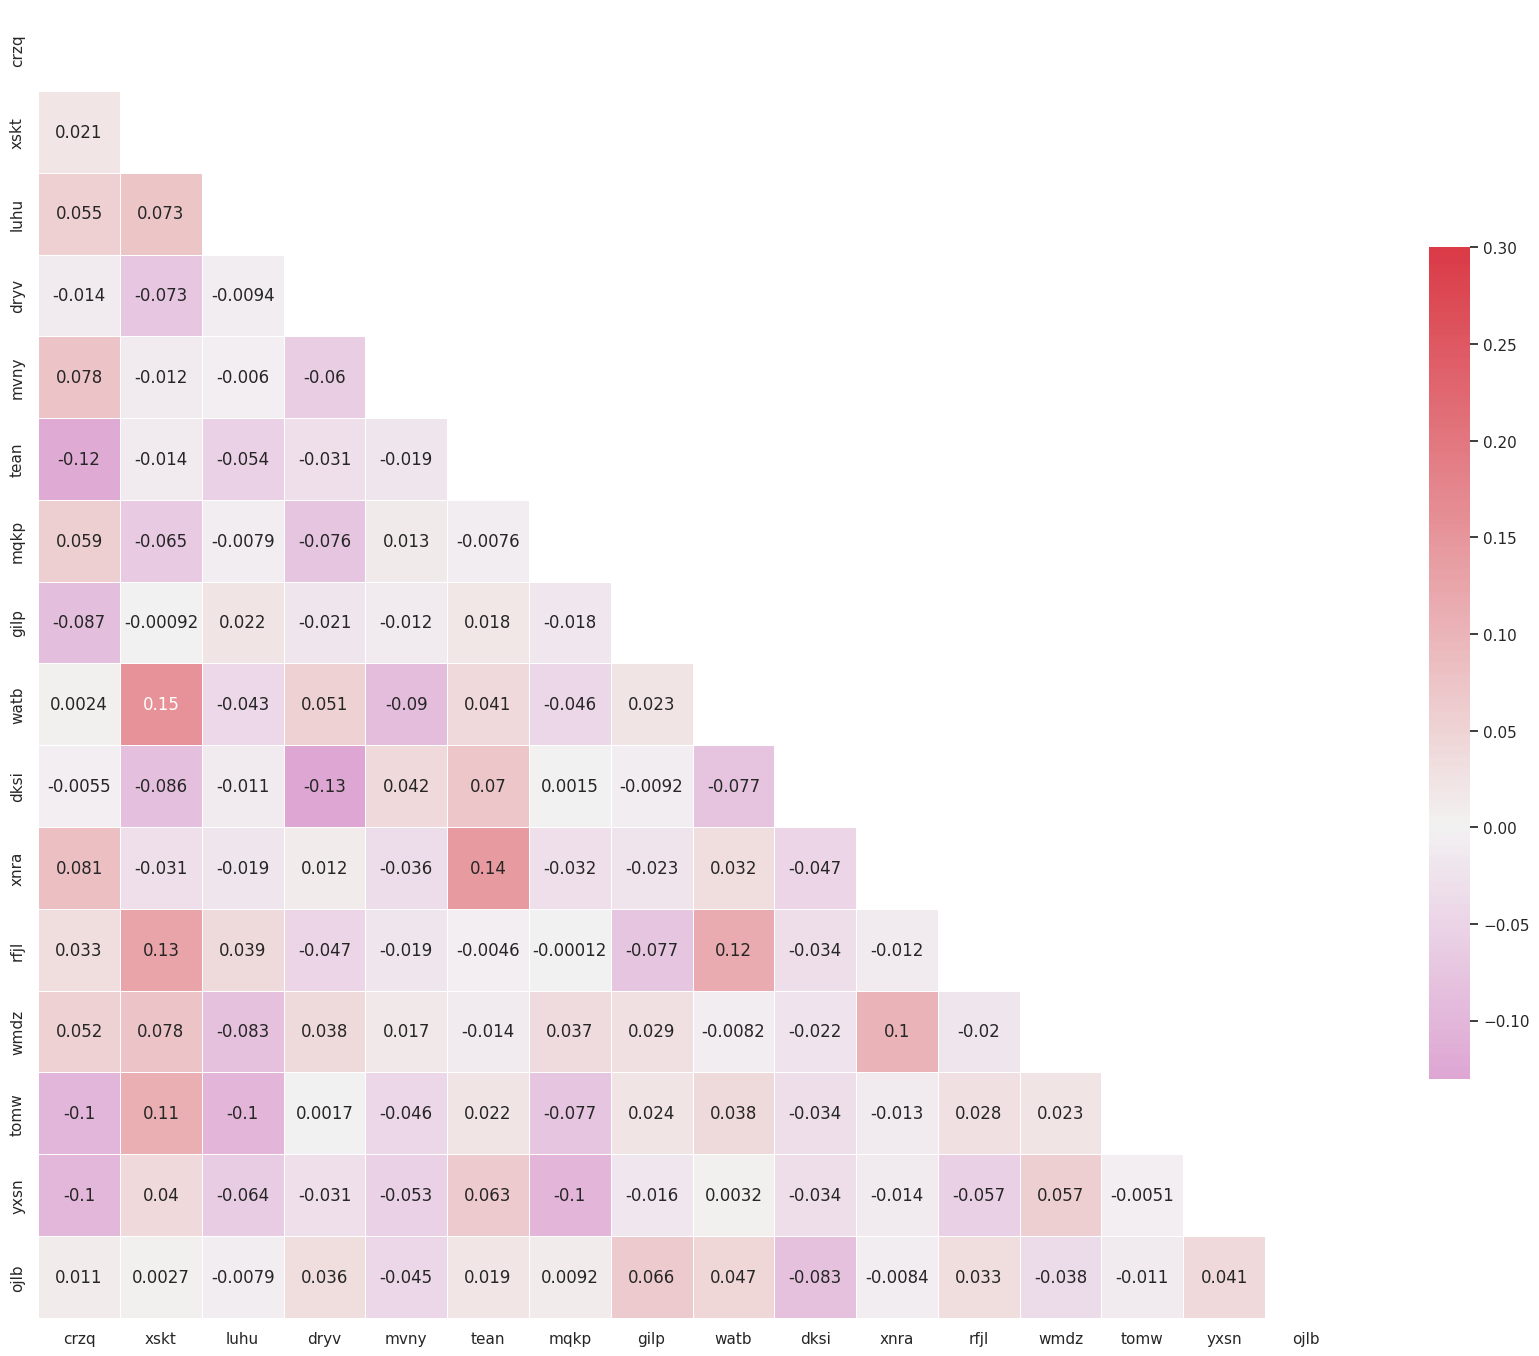

In [ ]:
# show correlation heat map for features, check for multicollinearity

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train._get_numeric_data().corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(17, 17))

# generate a custom diverging colormap
cmap = sns.diverging_palette(320, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

In [ ]:
# https://gist.github.com/wjptak/88575bbc5dde446e1186ffd41475c0f1
# identify pairs of correlated features


hi_corr = []

def get_highly_correlated_pairs(df, features, threshold=0.5):
  corr_df = df[features].corr() # get correlations
  correlated_features = np.where(np.abs(corr_df) > threshold) # select ones above the abs threshold
  correlated_features = [(corr_df.iloc[x,y], x, y) for x, y in zip(*correlated_features) if x != y and x < y] # avoid duplication
  s_corr_list = sorted(correlated_features, key=lambda x: -abs(x[0])) # sort by correlation value

  if s_corr_list == []:
    print("There are no highly correlated features with correlation above", threshold)
  else:
    for v, i, j in s_corr_list:
      cols = df[features].columns
      # print ("%s and %s = %.3f" % (corr_df.index[i], corr_df.columns[j], v))
      hi_corr.append([corr_df.index[i], corr_df.index[j]])

get_highly_correlated_pairs(X_train._get_numeric_data(), X_train._get_numeric_data().columns)
# hi_corr

There are no highly correlated features with correlation above 0.5


In [ ]:
# delete one of the features out of the pair(s) that show multicollinearity
for pairs in hi_corr:
  # print(pairs[0])
  X_train.drop(pairs[0], axis=1, inplace=True)
  X_test.drop(pairs[0], axis=1, inplace=True)

In [ ]:

# vif test
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train._get_numeric_data().dropna().copy()
# add constant
X.insert(0, 'const', 1)

# create dataframe to store vif information
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# remove constant (first row) and show vif dataframe
X.drop('const', axis=1, inplace=True)
vif = vif.iloc[1: , :]
vif

,Feature,VIF
1,crzq,1.065977
2,xskt,1.087176
3,luhu,1.039944
4,dryv,1.047187
5,mvny,1.025956
6,tean,1.055006
7,mqkp,1.036384
8,gilp,1.025270
9,watb,1.059879
10,dksi,1.049072


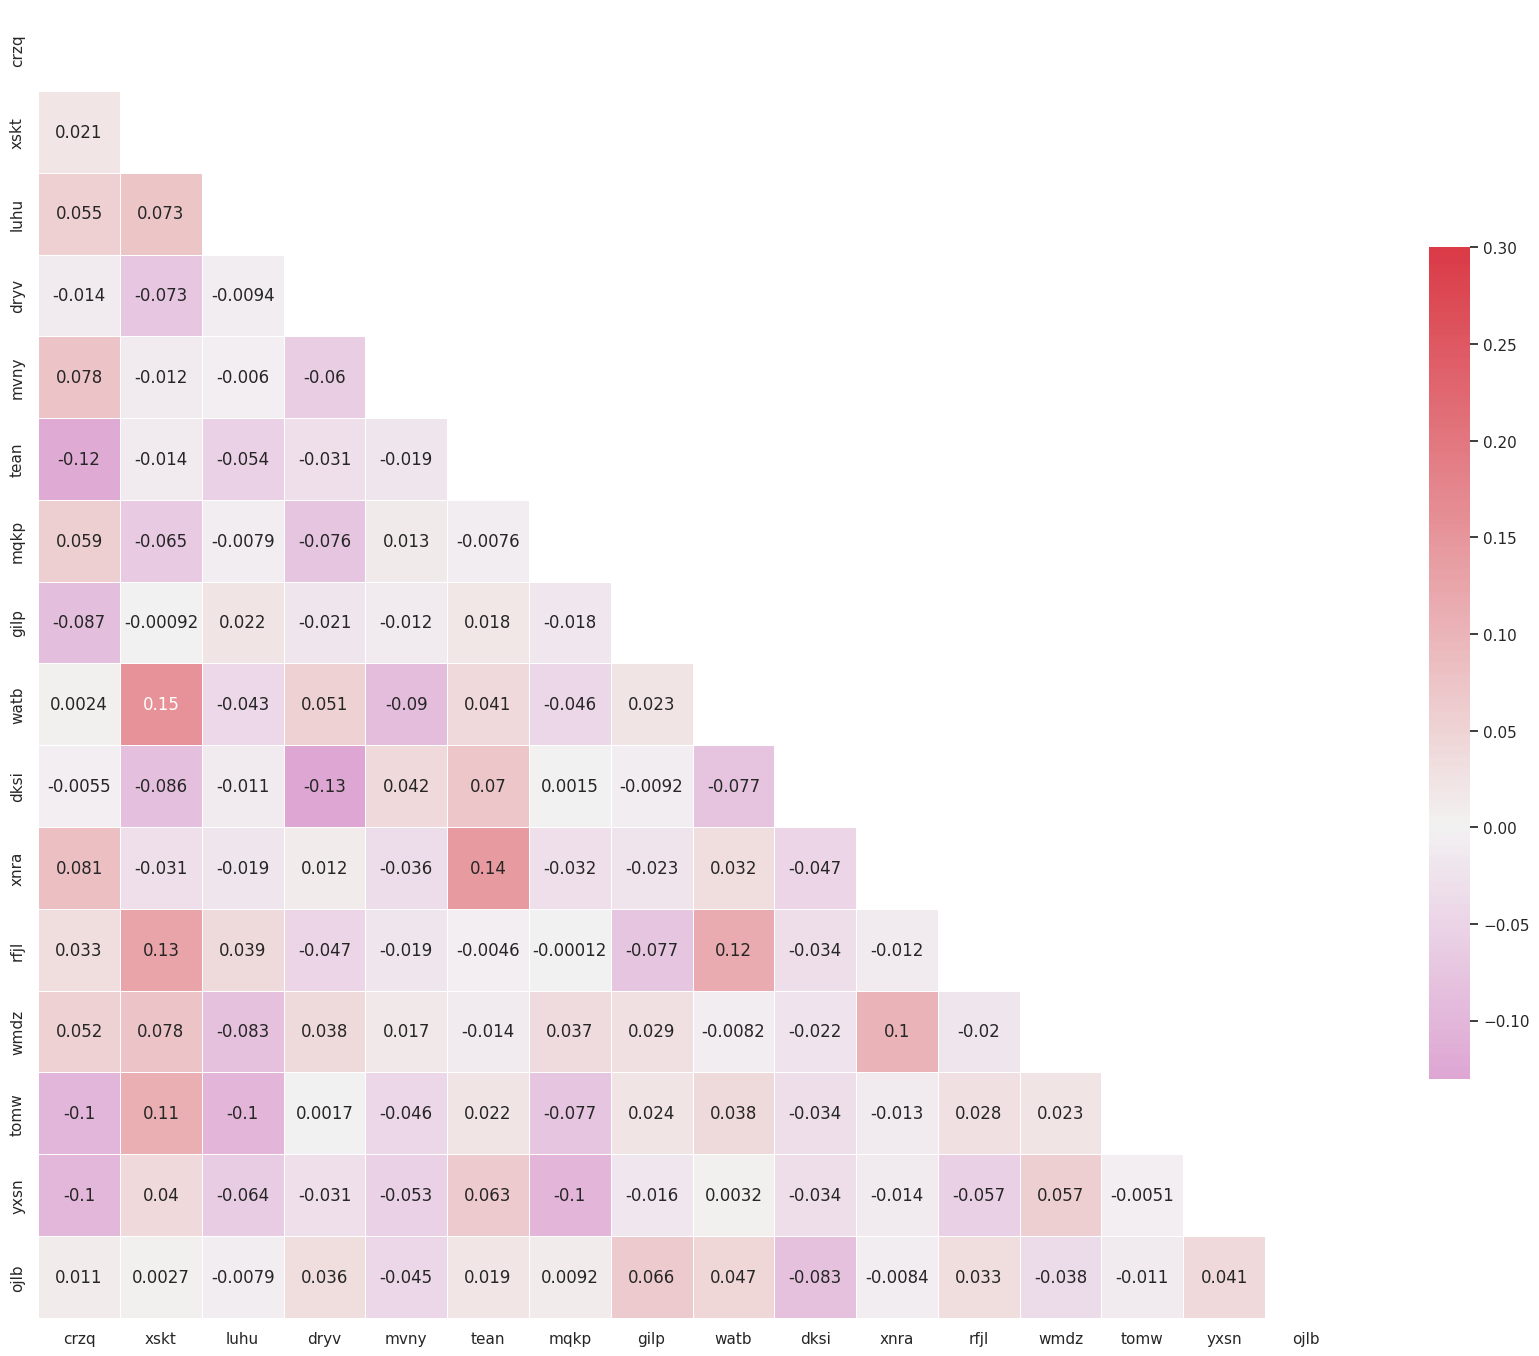

In [ ]:
# verify multicollinearity has been removed by re-showing a correlation heat map for features

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# correlation matrix
sns.set(style="white")

# compute the correlation matrix
corr = X_train._get_numeric_data().corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# set up the matplotlib figure
# f, ax = plt.subplots()
f = plt.figure(figsize=(17, 17))

# generate a custom diverging colormap
cmap = sns.diverging_palette(320, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True);

plt.tight_layout()

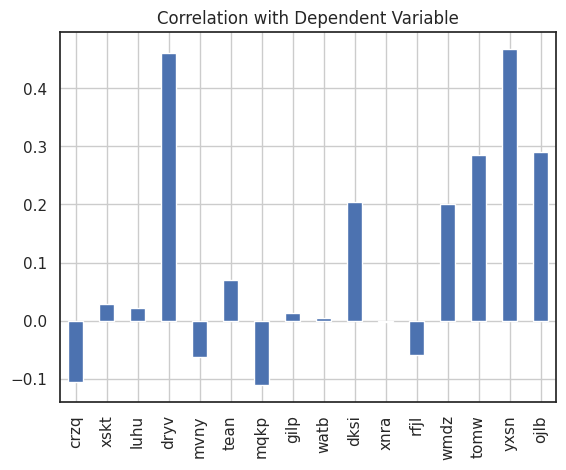

In [ ]:
# correlation with target (corrwith bar chart)

X_train._get_numeric_data().corrwith(y_train).plot.bar(
        title = 'Correlation with Dependent Variable', rot = 90, grid = True);

### Create the Models

In [ ]:
# sklearn linear regression with mse and R-squared

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train._get_numeric_data(), y_train)
# lr_feat_coeffs = list(zip(X_train._get_numeric_data(), lr_model.coef_))
feats = ['const']
feats.extend(X_train._get_numeric_data().columns)
coefs = [lr_model.intercept_]
coefs.extend(lr_model.coef_)
d = {'Feature': feats, 'Coef': coefs}
lr_df = pd.DataFrame(d)
print(lr_df)

# test set prediction results
yhat = lr_model.predict(X_test._get_numeric_data())
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=yhat)}')
print(f'R-Squared: {r2_score(y_test, yhat)}')

   Feature       Coef
0    const   6.820332
1     crzq -22.350586
2     xskt   4.336584
3     luhu  21.620096
4     dryv  92.788055
5     mvny   1.185483
6     tean   4.817131
7     mqkp  -1.147712
8     gilp  -0.738930
9     watb  -3.699434
10    dksi  60.099406
11    xnra   0.755218
12    rfjl  -3.112808
13    wmdz  32.985342
14    tomw  56.552424
15    yxsn  93.663726
16    ojlb  53.836938
MSE: 8283.956048661445
R-Squared: 0.7914321786363584


In [ ]:
# statsmodel ols with summary

import statsmodels.api as sm

# features should have a constant or intercept
# X_train = sm.add_constant(X_train)
X_with_const = X_train._get_numeric_data().copy()
X_with_const.insert(0, 'const', 1)
ols_model = sm.OLS(y_train, X_with_const).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     62.47
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           3.93e-93
Time:                        20:56:18   Log-Likelihood:                -2251.0
No. Observations:                 375   AIC:                             4536.
Df Residuals:                     358   BIC:                             4603.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8203     10.755      0.634      0.5

In [ ]:
# show the coefficient using linear algebra matrices

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# linalg needs constant that was inserted for OLS and we already have OLS model
print('Sklearn Linear Regression Model')
print(lr_df)
# print(lr_model.intercept_)
print()
print('StatsModel')
print(ols_model.params)
print()

X = X_with_const
y = y_train
print('Numpy Linear Algebra')
print('weights = ', np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y))

Sklearn Linear Regression Model
   Feature       Coef
0    const   6.820332
1     crzq -22.350586
2     xskt   4.336584
3     luhu  21.620096
4     dryv  92.788055
5     mvny   1.185483
6     tean   4.817131
7     mqkp  -1.147712
8     gilp  -0.738930
9     watb  -3.699434
10    dksi  60.099406
11    xnra   0.755218
12    rfjl  -3.112808
13    wmdz  32.985342
14    tomw  56.552424
15    yxsn  93.663726
16    ojlb  53.836938

StatsModel
const     6.820332
crzq    -22.350586
xskt      4.336584
luhu     21.620096
dryv     92.788055
mvny      1.185483
tean      4.817131
mqkp     -1.147712
gilp     -0.738930
watb     -3.699434
dksi     60.099406
xnra      0.755218
rfjl     -3.112808
wmdz     32.985342
tomw     56.552424
yxsn     93.663726
ojlb     53.836938
dtype: float64

Numpy Linear Algebra
weights =  [  6.82033197 -22.35058608   4.33658433  21.62009621  92.78805523
   1.18548272   4.81713097  -1.1477119   -0.7389299   -3.69943386
  60.09940581   0.755218    -3.11280801  32.98534177  56.

#### Lasso / l1 Regularization

* $\alpha = \sum|w_i|$
* Forces weak features to have zero coefficients
* Performs feature selection
* Models can be unstable (coefficients fluctuate significantly on data changes with correlated features)

In [ ]:
# create X _get_numeric_data() without constant
X_reg = X_with_const.drop('const', axis=1).copy()
print(X_reg.columns)
X_reg_test = X_test[X_reg.columns]
print(X_reg_test.columns)

Index(['crzq', 'xskt', 'luhu', 'dryv', 'mvny', 'tean', 'mqkp', 'gilp', 'watb',
       'dksi', 'xnra', 'rfjl', 'wmdz', 'tomw', 'yxsn', 'ojlb'],
      dtype='object')
Index(['crzq', 'xskt', 'luhu', 'dryv', 'mvny', 'tean', 'mqkp', 'gilp', 'watb',
       'dksi', 'xnra', 'rfjl', 'wmdz', 'tomw', 'yxsn', 'ojlb'],
      dtype='object')


In [ ]:
# lasso regularization

from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X_reg)
y = y_train
lasso_feats = X_reg.columns

lasso = Lasso(alpha=5)
lasso.fit(X, y)

d = {'Feature': lasso_feats, 'Coef': lasso.coef_}
lasso_df = pd.DataFrame(d)
print(lasso_df)


   Feature       Coef
0     crzq  -2.312277
1     xskt   0.000000
2     luhu  14.365255
3     dryv  89.853360
4     mvny   0.000000
5     tean   0.408812
6     mqkp  -0.000000
7     gilp   0.000000
8     watb  -0.000000
9     dksi  55.412990
10    xnra   0.000000
11    rfjl  -0.000000
12    wmdz  28.406950
13    tomw  52.631841
14    yxsn  86.120542
15    ojlb  49.999028


#### Ridge / l2 Regularization

* $\alpha = \sum w_i^2$
* Spreads out coefficients more equally
* Exposes correlated features (have similar coefficients)
* Models are more stable (coefficients don't fluctuate as much on data changes with correlated features)

In [ ]:
# ridge regularization

from sklearn.linear_model import Ridge

scaler = StandardScaler()

# .values is used to avoid warning about training on feature names
# UserWarning: X has feature names, but Ridge was fitted without feature names
X = scaler.fit_transform(X_reg.values)
X_reg_test = scaler.transform(X_reg_test.values)
y = y_train.values
y_reg_test = y_test.values

ridge_feats = X_reg.columns

ridge = Ridge(alpha=10)
ridge.fit(X,y)

d = {'Feature': ridge_feats, 'Coef': ridge.coef_}
ridge_df = pd.DataFrame(d)
print(ridge_df)
print()
print(f'Training Score: {ridge.score(X, y)}')
print(f'Test Score: {ridge.score(X_reg_test, y_reg_test)}')

   Feature       Coef
0     crzq  -6.674251
1     xskt   4.491715
2     luhu  19.892679
3     dryv  93.029533
4     mvny   0.829647
5     tean   4.779788
6     mqkp  -1.657421
7     gilp  -0.687841
8     watb  -3.453220
9     dksi  59.587895
10    xnra   0.579745
11    rfjl  -3.212863
12    wmdz  32.811080
13    tomw  55.925926
14    yxsn  87.769253
15    ojlb  54.284338

Training Score: 0.7356580175873209
Test Score: 0.7877553263290037


In [ ]:
# compare the coefficients from the linear regression, lasso, and ridge models

d = {'Original': X_reg.columns, 'Original Coeffs': lr_model.coef_.tolist(), 'Lasso': lasso_feats, 'Lasso Coeffs': lasso.coef_, 'Ridge': ridge_feats, 'Ridge Coeffs': ridge.coef_}
reg_df = pd.DataFrame(d)
print(reg_df[1:])

   Original  Original Coeffs Lasso  Lasso Coeffs Ridge  Ridge Coeffs
1      xskt         4.336584  xskt      0.000000  xskt      4.491715
2      luhu        21.620096  luhu     14.365255  luhu     19.892679
3      dryv        92.788055  dryv     89.853360  dryv     93.029533
4      mvny         1.185483  mvny      0.000000  mvny      0.829647
5      tean         4.817131  tean      0.408812  tean      4.779788
6      mqkp        -1.147712  mqkp     -0.000000  mqkp     -1.657421
7      gilp        -0.738930  gilp      0.000000  gilp     -0.687841
8      watb        -3.699434  watb     -0.000000  watb     -3.453220
9      dksi        60.099406  dksi     55.412990  dksi     59.587895
10     xnra         0.755218  xnra      0.000000  xnra      0.579745
11     rfjl        -3.112808  rfjl     -0.000000  rfjl     -3.212863
12     wmdz        32.985342  wmdz     28.406950  wmdz     32.811080
13     tomw        56.552424  tomw     52.631841  tomw     55.925926
14     yxsn        93.663726  yxsn

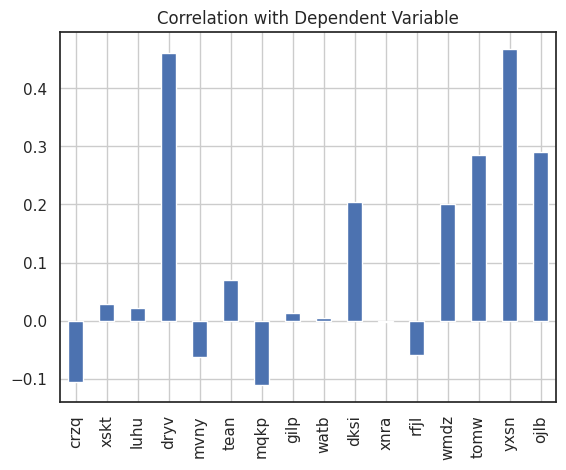

In [ ]:
# X_reg correlation with target

X_reg.corrwith(y_train).plot.bar(
        title = 'Correlation with Dependent Variable', rot = 90, grid = True);

In [ ]:
# ols summary recall
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     62.47
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           3.93e-93
Time:                        20:56:20   Log-Likelihood:                -2251.0
No. Observations:                 375   AIC:                             4536.
Df Residuals:                     358   BIC:                             4603.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8203     10.755      0.634      0.5

In [ ]:
# create a statsmodel ols model using the relevant features found in the Lasso model, print the summary

import statsmodels.api as sm

X_sel_feats = X_reg[['tomw', 'yxsn', 'ojlb', 'wmdz']]
X_sel_feats.insert(0, 'const', 1)
ols_model = sm.OLS(y_train, X_sel_feats).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     64.13
Date:                Tue, 17 Oct 2023   Prob (F-statistic):           3.72e-41
Time:                        21:01:07   Log-Likelihood:                -2402.1
No. Observations:                 375   AIC:                             4814.
Df Residuals:                     370   BIC:                             4834.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9982      7.658     -0.261      0.7

### Model Comparison

Provide a comparison between the original OLS model and the reduced features OLS model created with the help of l1 regularization. Make mention of the following:

* R-squared
* Adj R-squared
* F-statistic
* AIC and BIC
* The coefficients that are common in both models
* The standard error for each coefficient
* The t-statistic
* The critical value
* The p-value
* The 95% confidence interval

In [ ]:
# create, train, and test a model using a pipeline that includes a StandardScaler and a Lasso Regression model, output the training and testing scores

from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = [
    ('scalar', StandardScaler()),
    ('model', Lasso(alpha=5, fit_intercept=True))
]

pipe_model = Pipeline(pipe)
pipe_model.fit(X_reg.values, y_train.values)

d = {'Feature': X_reg.columns, 'Coef': pipe_model['model'].coef_}
pipe_df = pd.DataFrame(d)
print(pipe_df)
print()
print(f'Training Score: {pipe_model.score(X_reg.values, y_train.values)}')
print(f'Test Score: {pipe_model.score(X_reg_test, y_reg_test)}')
print()
print(f'Training Score: {lasso.score(X, y)}')
print(f'Test Score: {lasso.score(X_reg_test, y_reg_test)}')

   Feature       Coef
0     crzq  -2.312277
1     xskt   0.000000
2     luhu  14.365255
3     dryv  89.853360
4     mvny   0.000000
5     tean   0.408812
6     mqkp  -0.000000
7     gilp   0.000000
8     watb  -0.000000
9     dksi  55.412990
10    xnra   0.000000
11    rfjl  -0.000000
12    wmdz  28.406950
13    tomw  52.631841
14    yxsn  86.120542
15    ojlb  49.999028

Training Score: 0.7284979567814862
Test Score: 0.7716309465453344

Training Score: 0.7284979567814862
Test Score: 0.780269167741111


## Assignment Summary

We got the data from csv file and used train test split, then we created models. Linear regression model is built and the MSE and R-squared are found for it.We got the intercept and coefficients for the model. We plotted pairplot to see spread. Then we built an OLS model and with linear algebra weights as well we found the coefficients and intercept.

We can conclude that in all these three ways the intercept, coefficients and few parameters seem to be the same.

We have used make_regression method to simulate random data, then we have converted that dataset into dataframe. We then used train test split to train the dataframe.We have used shape,describe and hist methods on this trained data.

From histograms we can see that X_train is having skewed and normal data,we have replaced missing data with median for skewed data and used interpolation of regular method for normal data. We found VIF of all variables and then removed multicollinearity by dropping one of the coulmn.We plotted correlation heat map and could see that multicollinearity is removed.Then the X_train correlation with Target y_train is taken and could see ean is highly correlated with target.

We built a linear regression model, then found parameters of mean squared error and r-squared error, intercepts and coefficients. The squared values are used to reduce the errors, then we presented the summary of our model which has same coefficients and r-squared values as above linear regression model.

We then drawn the pairplot, in this the red line indicates the correlation between the features and the spread of the color shows confidence interval which is spread out at the ends as little data is present and is narrowed at the middle.

We have removed the constant and then performed Lasso and Ridge regularization on the dataset and compared allthese coefficients. Then we found the correlation with target variable.Plotted heatmap for those values. We have removed two values based on Lasso coefficients whose values are zero, so we performed feature selection based on lasso regularization.

We learnt that R-squared is coefficient of determination. F-statistic and the probability of it. And AIC and all the coefficients in table which are shown after summary.
